## Default of Credit Card Clients Dataset

A Taiwan-based credit card issuer wants to better predict the likelihood of default for its customers, as well as identify the key drivers that determine this likelihood. This would inform the issuer’s decisions on who to give a credit card to and what credit limit to provide. It would also help the issuer have a better understanding of their current and potential customers, which would inform their future strategy, including their planning of offering targeted credit products to their customers.

## Dataset Information

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.


There are 25 variables:

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

(Data source: https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset. We acknowledge the following: Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.)

### Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import numpy
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold

In [3]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion, Pipeline 

In [4]:
pd.set_option('display.max_columns',None)

### Loading Dataset

In [4]:
credit_card=pd.read_csv('UCI_Credit_Card.csv')
credit_card.sample(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
6780,6781,150000.0,1,3,1,43,0,0,0,0,...,46602.0,40599.0,37192.0,3008.0,2014.0,1599.0,2014.0,2018.0,1041.0,0
24842,24843,380000.0,1,2,1,43,0,-1,-1,0,...,259176.0,47494.0,129274.0,96778.0,243301.0,21066.0,2137.0,110000.0,50110.0,0
20060,20061,160000.0,2,1,1,43,-1,-1,-1,-1,...,450.0,748.0,5054.0,2817.0,0.0,450.0,748.0,5054.0,4711.0,1


### Nature of the Data

In [5]:
print("Dataset contains",credit_card.shape[0],"samples and" , credit_card.shape[1], "features")

Dataset contains 30000 samples and 25 features


### Dataset Attributes

In [5]:
credit_card.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

### Statistical Overview 

In [6]:
credit_card.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


From the above statistical summary it is evident that

* There are 30000 distinct id's in the dataset which means 30000 credit card holders.

* The average credit limit amount is 167,484.32 with std. 129,747.66 where the highest amount is 1000000.

* Most of the card holders are either graduate school or university.

* Most of the credit card holders are either married or single

* Credit card holders age ranges from 21 to 79 and the average age is 35.48 with standard deviation 9.21

* If we look at our target column which includes two distinct values 0 and 1 where 0 for default payment means "not default" and 1 means "default", and the mean is 0.221 which means that there are 22.1% card holders who will default next month.


### Concise summary of the dataframe

In [7]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

### Outcome Variable Overview

In [8]:
credit_card["default.payment.next.month"].value_counts(normalize = True)*100

0    77.88
1    22.12
Name: default.payment.next.month, dtype: float64

Almost one in every 3-4 people will end up defaulting.

#### Data Imbalance

In [9]:
import warnings 
warnings.filterwarnings('ignore')

### Grouping unknown values in education

In [8]:
credit_card['EDUCATION'][(credit_card['EDUCATION']==5) | (credit_card['EDUCATION']==6) | (credit_card['EDUCATION']==0)] = 4
credit_card['EDUCATION'].value_counts()

C:\Users\kevin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

### Grouping unknown values in marriage

In [10]:
credit_card['MARRIAGE'][credit_card['MARRIAGE'] == 0] = 3
credit_card.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

### Renaming attributes

In [11]:
credit_card = credit_card.rename(columns={'default.payment.next.month': 'DEFAULT', 
                        'PAY_0': 'PAY_1'})
credit_card.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


# FEATURE ENGINEERING

I want something to describe the expenses of a clientI am thinking of something like average expenses at any given month (again, for this first prediction I will just care about the last month but I might need the others later). Moreover, I want to give some context to it, so I will divide that number by LIMIT_BAL, so that we have a sort of extimation of how "careless" a client is.

In [11]:
credit_card['Avg_exp_5'] = ((credit_card['BILL_AMT5'] - (credit_card['BILL_AMT6'] - credit_card['PAY_AMT5']))) / credit_card['LIMIT_BAL']
credit_card['Avg_exp_4'] = (((credit_card['BILL_AMT5'] - (credit_card['BILL_AMT6'] - credit_card['PAY_AMT5'])) +
                 (credit_card['BILL_AMT4'] - (credit_card['BILL_AMT5'] - credit_card['PAY_AMT4']))) / 2) / credit_card['LIMIT_BAL']
credit_card['Avg_exp_3'] = (((credit_card['BILL_AMT5'] - (credit_card['BILL_AMT6'] - credit_card['PAY_AMT5'])) +
                 (credit_card['BILL_AMT4'] - (credit_card['BILL_AMT5'] - credit_card['PAY_AMT4'])) +
                 (credit_card['BILL_AMT3'] - (credit_card['BILL_AMT4'] - credit_card['PAY_AMT3']))) / 3) / credit_card['LIMIT_BAL']
credit_card['Avg_exp_2'] = (((credit_card['BILL_AMT5'] - (credit_card['BILL_AMT6'] - credit_card['PAY_AMT5'])) +
                 (credit_card['BILL_AMT4'] - (credit_card['BILL_AMT5'] - credit_card['PAY_AMT4'])) +
                 (credit_card['BILL_AMT3'] - (credit_card['BILL_AMT4'] - credit_card['PAY_AMT3'])) +
                 (credit_card['BILL_AMT2'] - (credit_card['BILL_AMT3'] - credit_card['PAY_AMT2']))) / 4) / credit_card['LIMIT_BAL']
credit_card['Avg_exp_1'] = (((credit_card['BILL_AMT5'] - (credit_card['BILL_AMT6'] - credit_card['PAY_AMT5'])) +
                 (credit_card['BILL_AMT4'] - (credit_card['BILL_AMT5'] - credit_card['PAY_AMT4'])) +
                 (credit_card['BILL_AMT3'] - (credit_card['BILL_AMT4'] - credit_card['PAY_AMT3'])) +
                 (credit_card['BILL_AMT2'] - (credit_card['BILL_AMT3'] - credit_card['PAY_AMT2'])) +
                 (credit_card['BILL_AMT1'] - (credit_card['BILL_AMT2'] - credit_card['PAY_AMT1']))) / 5) / credit_card['LIMIT_BAL']
credit_card[['LIMIT_BAL', 'Avg_exp_5', 'BILL_AMT5', 'Avg_exp_4', 'BILL_AMT4','Avg_exp_3', 'BILL_AMT3',
    'Avg_exp_2', 'BILL_AMT2', 'Avg_exp_1', 'BILL_AMT1', 'DEFAULT']].sample(3)

,LIMIT_BAL,Avg_exp_5,BILL_AMT5,Avg_exp_4,BILL_AMT4,Avg_exp_3,BILL_AMT3,Avg_exp_2,BILL_AMT2,Avg_exp_1,BILL_AMT1,DEFAULT
22543,200000.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,1
3421,110000.0,0.026827,3102.0,0.024200,1475.0,0.023324,2373.0,0.022886,2373.0,0.019325,2932.0,0
22349,490000.0,0.020247,93461.0,0.039039,118595.0,0.041042,52074.0,0.053332,93626.0,0.058275,128821.0,0


how far the bill is from the limit should matter, thus I will create that variable. Since the result can vary a lot from one client to the other (the LIMIT_BAL variable has a very wide range), I will again weight this difference on the LIMIT_BAL feature . Again, I want to keep the historical trend of the variable

In [14]:
credit_card.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,Avg_exp_5,Avg_exp_4,Avg_exp_3,Avg_exp_2,Avg_exp_1
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,1,0.000000,0.000000,0.011483,0.047387,0.046020
1,2,120000.0,2,2,2,26,-1,2,0,0,...,1000.0,1000.0,0.0,2000.0,1,0.001617,0.004213,0.003947,0.003050,0.004035
2,3,90000.0,2,2,2,34,0,0,0,0,...,1000.0,1000.0,1000.0,5000.0,0,0.004433,0.004344,0.003741,0.008272,0.043796
3,4,50000.0,2,2,1,37,0,0,0,0,...,1200.0,1100.0,1069.0,1000.0,0,0.009620,0.009360,0.154087,0.120370,0.099324
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,10000.0,9000.0,689.0,679.0,0,0.014080,0.114980,0.242620,0.214545,0.191424


In [12]:
credit_card['Closeness_6'] = (credit_card.LIMIT_BAL - credit_card.BILL_AMT6) / credit_card.LIMIT_BAL
credit_card['Closeness_5'] = (credit_card.LIMIT_BAL - credit_card.BILL_AMT5) / credit_card.LIMIT_BAL
credit_card['Closeness_4'] = (credit_card.LIMIT_BAL - credit_card.BILL_AMT4) / credit_card.LIMIT_BAL
credit_card['Closeness_3'] = (credit_card.LIMIT_BAL - credit_card.BILL_AMT3) / credit_card.LIMIT_BAL
credit_card['Closeness_2'] = (credit_card.LIMIT_BAL - credit_card.BILL_AMT2) / credit_card.LIMIT_BAL
credit_card['Closeness_1'] = (credit_card.LIMIT_BAL - credit_card.BILL_AMT1) / credit_card.LIMIT_BAL
credit_card[['Closeness_6', 'Closeness_5', 'Closeness_4', 'Closeness_3', 'Closeness_2',
   'Closeness_1', 'DEFAULT']].sample(3)

,Closeness_6,Closeness_5,Closeness_4,Closeness_3,Closeness_2,Closeness_1,DEFAULT
18080,0.731235,0.714365,0.669006,0.665747,0.673524,0.680018,0
23024,0.335280,0.325970,0.305180,0.299966,0.294260,0.294028,0
17366,0.898267,0.905233,0.898667,0.940833,0.975300,1.000000,0


In [13]:
credit_card.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,Avg_exp_4,Avg_exp_3,Avg_exp_2,Avg_exp_1,Closeness_6,Closeness_5,Closeness_4,Closeness_3,Closeness_2,Closeness_1
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.000000,0.011483,0.047387,0.046020,1.000000,1.000000,1.000000,0.965550,0.844900,0.804350
1,2,120000.0,2,2,2,26,-1,2,0,0,...,0.004213,0.003947,0.003050,0.004035,0.972825,0.971208,0.972733,0.977650,0.985625,0.977650
2,3,90000.0,2,2,2,34,0,0,0,0,...,0.004344,0.003741,0.008272,0.043796,0.827233,0.833911,0.840767,0.849344,0.844144,0.675122
3,4,50000.0,2,2,1,37,0,0,0,0,...,0.009360,0.154087,0.120370,0.099324,0.409060,0.420820,0.433720,0.014180,0.035340,0.060200
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,0.114980,0.242620,0.214545,0.191424,0.617380,0.617080,0.581200,0.283300,0.886600,0.827660


In [109]:
credit_card.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [14]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           30000 non-null  int64  
 1   LIMIT_BAL    30000 non-null  float64
 2   SEX          30000 non-null  int64  
 3   EDUCATION    30000 non-null  int64  
 4   MARRIAGE     30000 non-null  int64  
 5   AGE          30000 non-null  int64  
 6   PAY_1        30000 non-null  int64  
 7   PAY_2        30000 non-null  int64  
 8   PAY_3        30000 non-null  int64  
 9   PAY_4        30000 non-null  int64  
 10  PAY_5        30000 non-null  int64  
 11  PAY_6        30000 non-null  int64  
 12  BILL_AMT1    30000 non-null  float64
 13  BILL_AMT2    30000 non-null  float64
 14  BILL_AMT3    30000 non-null  float64
 15  BILL_AMT4    30000 non-null  float64
 16  BILL_AMT5    30000 non-null  float64
 17  BILL_AMT6    30000 non-null  float64
 18  PAY_AMT1     30000 non-null  float64
 19  PAY_

In [15]:
credit_card=credit_card[[c for c in credit_card if c not in ['DEFAULT']] 
       + ['DEFAULT']]

In [12]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_1      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

# outliers and its treatment

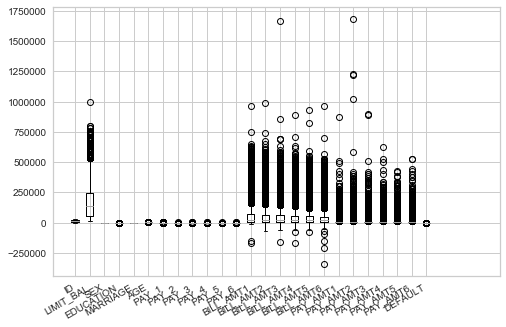

In [74]:
fig, ax = plt.subplots()
credit_card.boxplot()
ax.set_xlim(-0.5, 30)
fig.autofmt_xdate()
plt.show()
    

In [17]:
from sklearn.model_selection import train_test_split
X = credit_card.iloc[:, 1:-1]
y = credit_card.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=123)

In [45]:
#before Feature engineering
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
res = GLM(y_train, X_train,
          family=families.Binomial()).fit(attach_wls=True, atol=1e-10)
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                DEFAULT   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20977
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9799.5
Date:                Tue, 30 Jun 2020   Deviance:                       19599.
Time:                        03:40:42   Pearson chi2:                 2.51e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LIMIT_BAL  -6.203e-07   1.83e-07     -3.392      0.0

In [26]:
#after feature engineering
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
res = GLM(y_train, X_train,
          family=families.Binomial()).fit(attach_wls=True, atol=1e-10)
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                DEFAULT   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20966
Model Family:                Binomial   Df Model:                           33
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9773.5
Date:                Wed, 01 Jul 2020   Deviance:                       19547.
Time:                        20:56:37   Pearson chi2:                 2.47e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
LIMIT_BAL   -1.336e-06    2.5e-07     -5.350      

In [28]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.465403
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.123     
Dependent Variable: DEFAULT          AIC:              19614.9266
Date:               2020-07-01 21:35 BIC:              19885.3040
No. Observations:   21000            Log-Likelihood:   -9773.5   
Df Model:           33               LL-Null:          -11150.   
Df Residuals:       20966            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|    [0.025    0.975]
------------------------------------------------------------------
LIMIT_BAL    -0.0000    0.0000  -5.3496  0.0000   -0.0000  -0.0000
SEX          -0.2255    0.0327  -6.8964  0.0000   -0.2896  -0.

# MODELLING

This step consists in trying to find the best model which can predict our target value (default credit payment the following month). As we have seen during our EDA, we still need to do some data engineering in order to deal with categorical features and rescale the numerical features. Once the data engineering is done, we will take the following pragmatic approach :

Select list of known classification models
Run a baseline model for each of our pre-selected models
Pick the top models base on a specific score (recall score / f1 score in our case)
Tune the hyper-parameters of the top models and watch score increase
So below is the list of pre-selected classification models :

Logistic Regression
Decision Tree
Random Forest
AdaBoost
K Nearest Neighbors
XGBoost
SVC (Support Vector Classification)
In order to compare their performances, we need to define a which scoring metrics we are going to use. As we try to find out if the credit payment status (paid or not paid the following month), it is important to catch as much as possible the ones that are positive (not paid => target value = 1). Or in other words, we will try to minimise the False Positive classifications (paid status predicted when the actual status is not paid). This is exactly the Recall score definition. Also, we want to keep our accuracy high True Negative + True Positive observations. See below a visual definition

Precision Recall Definition

Recall, Precision and F1-score Formulas:

$Recall = \frac{TP}{TP + FN}$

$Precision = \frac{TP}{TP + FP}$

$F1 = 2 * \frac{Recall * Precision}{Recall + Precision}$

In [13]:
# Load utility librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#from utils import print_metrics, print_confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, recall_score

# Load pre-selected models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

%matplotlib inline
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

# Evaluate Algorithms: Baseline

In [14]:
# Test options and evaluation metric
num_folds = 10
seed = 7

Let's create a baseline of performance on this problem and spot-check a number of dierent
algorithms. We will select a suite of dierent algorithms capable of working on this classication
problem. The six algorithms selected include:

 Linear Algorithms: Logistic Regression (LR) and Linear Discriminant Analysis (LDA).

 Nonlinear Algorithms: Classication and Regression Trees (CART), Support Vector
Machines (SVM), Gaussian Naive Bayes (NB) and k-Nearest Neighbors (KNN).

In [15]:
# Split-out validation dataset
array = credit_card.values
X = array[:,:-1]
Y = array[:,-1]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

In [16]:
X_train.shape

(24000, 24)

In [17]:
column_names=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC']
model_results = pd.DataFrame(columns = column_names)

#### Building Pipeline feature engineering step

In [18]:
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

# Class Columns used to apply features transformation
class Columns(BaseEstimator, TransformerMixin):
    def __init__(self, names=None):
        self.names = names

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X):
        return X[self.names]

# List of numerical features
numeric = [
    'LIMIT_BAL',
    'AGE',
    'BILL_AMT1',
    'BILL_AMT2',
    'BILL_AMT3',
    'BILL_AMT4',
    'BILL_AMT5',
    'BILL_AMT6',
    'PAY_1',
    'PAY_2',
    'PAY_3',
    'PAY_4',
    'PAY_5',
    'PAY_6',
    'PAY_AMT1',
    'PAY_AMT2',
    'PAY_AMT3',
    'PAY_AMT4',
    'PAY_AMT5',
    'PAY_AMT6'
]

# List of categorical features
categorical = ['SEX', 'EDUCATION', 'MARRIAGE']

# Build feature engineering pipeline step
features = FeatureUnion([
        ('numeric', make_pipeline(Columns(names=numeric),StandardScaler())),
        ('categorical', make_pipeline(Columns(names=categorical),OneHotEncoder(sparse=False)))
    ])


## Building Pipeline Modeling Step

In [19]:
results = []
names = []
tested_models = {
    'lr': LogisticRegression(),
    'knn_clf': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'NB': GaussianNB(),
    'svm_clf': SVC()
}

column_names=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC']
model_results = pd.DataFrame(columns = column_names)

for model in tested_models:
    pipe = Pipeline([
        ("features", features),
        ('model', tested_models[model])
    ])
    kfold = KFold(n_splits=num_folds, random_state=seed)
    skf = StratifiedKFold(n_splits=num_folds, random_state=seed)
    
    cv_results = cross_validate(tested_models[model], X_train, Y_train, cv=skf,
                        scoring=('accuracy', 'precision', 'recall','f1','roc_auc'), return_train_score=False)
    results.append(cv_results)
    names.append(model)
    
    modeldf =  pd.DataFrame([[model,cv_results['test_accuracy'].mean(),cv_results['test_precision'].mean(),cv_results['test_recall'].mean(),cv_results['test_f1'].mean(),cv_results['test_roc_auc'].mean()]],
    columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    model_results = model_results.append(modeldf, ignore_index = True)

In [20]:
X_train.shape

(24000, 24)

In [21]:
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,lr,0.777250,0.200000,0.000374,0.000746,0.648759
1,knn_clf,0.743417,0.346498,0.173022,0.230422,0.594068
2,DecisionTree,0.725000,0.391156,0.420690,0.405304,0.616451
3,NB,0.372167,0.247331,0.889828,0.387049,0.671863
4,svm_clf,0.777250,0.000000,0.000000,0.000000,0.569558


In [39]:
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,lr,0.777208,0.150000,0.000374,0.000746,0.648921
1,knn_clf,0.743417,0.346498,0.173022,0.230422,0.594068
2,DecisionTree,0.723083,0.386824,0.415646,0.400569,0.613420
3,NB,0.372750,0.247536,0.890015,0.387318,0.671768
4,svm_clf,0.777250,0.000000,0.000000,0.000000,0.568021


In [22]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix


# class_weight=balanced

In [38]:
results = []
names = []

tested_models = {
    'lr_weightbalanced': LogisticRegression(class_weight='balanced'),
    'knn_clf': KNeighborsClassifier(),
    'DecisionTree_weightbalanced': DecisionTreeClassifier(class_weight='balanced'),
    'NB': GaussianNB(),
    'svm_clf__weightbalanced': SVC(class_weight='balanced')
}

column_names=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC']
model_results = pd.DataFrame(columns = column_names)

for model in tested_models:
    pipe = Pipeline([
        ("features", features),
        ('model', tested_models[model])
    ])
    kfold = KFold(n_splits=num_folds, random_state=seed)
    skf = StratifiedKFold(n_splits=num_folds, random_state=seed)
    
    cv_results = cross_validate(tested_models[model], X_train, Y_train, cv=skf,
                        scoring=('accuracy', 'precision', 'recall','f1','roc_auc'), return_train_score=False)
    y_pred=cross_val_predict(tested_models[model], X_train, Y_train,cv=10)
    print('confusion matrix for model: %s :'%(model))
    conf_mat=confusion_matrix(Y_train,y_pred)
    print(conf_mat)
    print('\n')
    
    results.append(cv_results)
    names.append(model)
    
    modeldf =  pd.DataFrame([[model,cv_results['test_accuracy'].mean(),cv_results['test_precision'].mean(),cv_results['test_recall'].mean(),cv_results['test_f1'].mean(),cv_results['test_roc_auc'].mean()]],
    columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    model_results = model_results.append(modeldf, ignore_index = True)

confusion matrix for model: lr_weightbalanced :
[[11010  7644]
 [ 2011  3335]]


confusion matrix for model: knn_clf :
[[16917  1737]
 [ 4421   925]]


confusion matrix for model: DecisionTree_weightbalanced :
[[15472  3182]
 [ 3220  2126]]


confusion matrix for model: NB :
[[ 4175 14479]
 [  589  4757]]


confusion matrix for model: svm_clf__weightbalanced :
[[10430  8224]
 [ 1784  3562]]




In [40]:
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,lr_weightbalanced,0.597708,0.303825,0.623828,0.408515,0.640876
1,knn_clf,0.743417,0.346498,0.173022,0.230422,0.594068
2,DecisionTree_weightbalanced,0.732833,0.399978,0.396934,0.398328,0.613017
3,NB,0.372167,0.247331,0.889828,0.387049,0.671863
4,svm_clf__weightbalanced,0.583000,0.302223,0.666301,0.415801,0.667797


In [37]:
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,lr_weightbalanced,0.597708,0.303825,0.623828,0.408515,0.640876
1,knn_clf,0.743417,0.346498,0.173022,0.230422,0.594068
2,DecisionTree,0.726333,0.392250,0.414709,0.403032,0.615177
3,NB,0.372167,0.247331,0.889828,0.387049,0.671863
4,svm_clf_balanced,0.583000,0.302223,0.666301,0.415801,0.667797


In [42]:
seed


7

 The results suggest That decision tree,naive bayes may be worth further study.
 also we have to check if smote brings a difference in f1 score of logreg and svm

These are just mean accuracy values. It is always wise to look at the distribution of accuracy
values calculated across cross validation folds. We can do that graphically using box and whisker
plots.

In [45]:
from sklearn.model_selection import cross_val_predict

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(class_weight='balanced'), 
               GaussianNB(), 
               KNeighborsClassifier(), 
               DecisionTreeClassifier(class_weight='balanced'),
               SVC(class_weight='balanced',probability=True)
               ]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, Y_train)
    yproba = model.predict_proba(X_validation)[::,1]
    
    fpr, tpr, _ = roc_curve(Y_validation,  yproba)
    auc = roc_auc_score(Y_validation, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

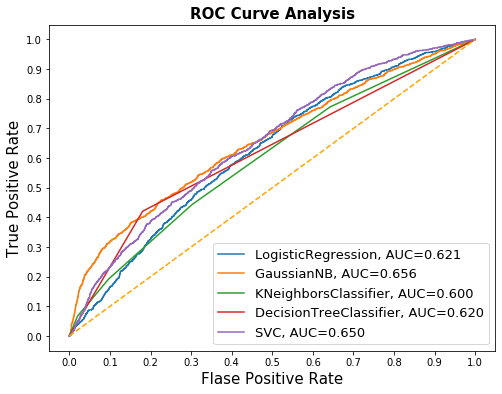

In [53]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show() 

In [ ]:
#Precision Recall Curve

In [99]:

result_table1 = pd.DataFrame(columns=['classifiers',
                                      'no_skill',
                                        'model_recall', 
                                        'model_precision'])

In [91]:
model_f1=[] 
model_auc=[]
model_precision=[]
model_recall=[]
no_skill=[]

In [92]:
classifiers = [LogisticRegression(class_weight='balanced'), 
               GaussianNB(), 
               KNeighborsClassifier(), 
               DecisionTreeClassifier(class_weight='balanced'),
               SVC(class_weight='balanced',probability=True)
               ]

In [93]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

for cls in classifiers:
    model = cls.fit(X_train, Y_train)
    yproba = model.predict_proba(X_validation)[::,1]
    
    # predict class values
    yhat = model.predict(X_validation)
    model_precision, model_recall, _ = precision_recall_curve(Y_validation, yproba)
    model_f1, model_auc = f1_score(Y_validation, yhat), auc(model_recall, model_precision)
    # summarize scores
    print('%s: f1=%.3f auc=%.3f' % (cls,model_f1, model_auc))
    # plot the precision-recall curves
    no_skill = len(Y_validation[Y_validation==1]) / len(Y_validation)
    result_table1 = result_table1.append({'classifiers':cls.__class__.__name__,
                                          'no_skill':no_skill,
                                        'model_recall':model_recall, 
                                        'model_precision':model_precision, 
                                        }, ignore_index=True)
# Set name of the classifiers as index labels
result_table1.set_index('classifiers', inplace=True)
    


LogisticRegression(class_weight='balanced'): f1=0.381 auc=0.286
GaussianNB(): f1=0.375 auc=0.387
KNeighborsClassifier(): f1=0.249 auc=0.308
DecisionTreeClassifier(class_weight='balanced'): f1=0.403 auc=0.466
SVC(class_weight='balanced', probability=True): f1=0.391 auc=0.319


In [94]:
result_table1.head()

,no_skill,model_recall,model_precision
classifiers,,,
LogisticRegression,0.215,"[1.0, 0.9992248062015504, 0.9992248062015504, ...","[0.21521521521521522, 0.2150842649758051, 0.21..."
GaussianNB,0.215,"[1.0, 0.9992248062015504, 0.9992248062015504, ...","[0.21521521521521522, 0.2150842649758051, 0.21..."
KNeighborsClassifier,0.215,"[1.0, 0.7728682170542636, 0.4434108527131783, ...","[0.215, 0.24770186335403727, 0.286429644466700..."
DecisionTreeClassifier,0.215,"[1.0, 0.4124031007751938, 0.0]","[0.215, 0.39320029563932, 1.0]"
SVC,0.215,"[1.0, 0.9992248062015504, 0.9992248062015504, ...","[0.215, 0.21486914485747624, 0.214904968322774..."


In [95]:
 result_table1.index

Index(['LogisticRegression', 'GaussianNB', 'KNeighborsClassifier',
       'DecisionTreeClassifier', 'SVC'],
      dtype='object', name='classifiers')

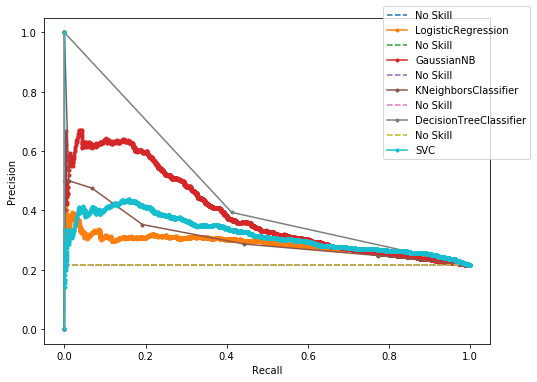

In [98]:
fig = plt.figure(figsize=(8,6))
#marker='.', label=result_table1.loc[i]['classifiers']
for i in result_table1.index:
    #r1=np.vectorize(result_table1.loc[i]['model_recall'])
   # r2=np.vectorize(result_table1.loc[i]['model_precision'])
    r1=result_table1.loc[i]['model_recall']
    r2=result_table1.loc[i]['model_precision']
    pyplot.plot( [0, 1],[result_table1.loc[i]['no_skill'], result_table1.loc[i]['no_skill']], linestyle='--', label='No Skill')
    pyplot.plot(r1, r2,
                
                marker='.', label=i)
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend(bbox_to_anchor=(1.1, 1.05))
# show the plot
pyplot.show()

In [ ]:
#Precision Recall Curve

In [110]:

result_table1 = pd.DataFrame(columns=['classifiers',
                                      'no_skill',
                                        'model_recall', 
                                        'model_precision'])

In [111]:
model_f1=[] 
model_auc=[]
model_precision=[]
model_recall=[]
no_skill=[]

In [112]:
classifiers = [LogisticRegression(), 
               GaussianNB(), 
               KNeighborsClassifier(), 
               DecisionTreeClassifier(),
               SVC(probability=True)
               ]

In [113]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

for cls in classifiers:
    model = cls.fit(X_train, Y_train)
    yproba = model.predict_proba(X_validation)[::,1]
    
    # predict class values
    yhat = model.predict(X_validation)
    model_precision, model_recall, _ = precision_recall_curve(Y_validation, yproba)
    model_f1, model_auc = f1_score(Y_validation, yhat), auc(model_recall, model_precision)
    # summarize scores
    print('%s: f1=%.3f auc=%.3f' % (cls,model_f1, model_auc))
    # plot the precision-recall curves
    no_skill = len(Y_validation[Y_validation==1]) / len(Y_validation)
    result_table1 = result_table1.append({'classifiers':cls.__class__.__name__,
                                          'no_skill':no_skill,
                                        'model_recall':model_recall, 
                                        'model_precision':model_precision, 
                                        }, ignore_index=True)
# Set name of the classifiers as index labels
result_table1.set_index('classifiers', inplace=True)
    


LogisticRegression(): f1=0.000 auc=0.306
GaussianNB(): f1=0.375 auc=0.387
KNeighborsClassifier(): f1=0.249 auc=0.308
DecisionTreeClassifier(): f1=0.393 auc=0.457
SVC(probability=True): f1=0.000 auc=0.232


In [114]:
result_table1.head()

,no_skill,model_recall,model_precision
classifiers,,,
LogisticRegression,0.215,"[1.0, 0.9992248062015504, 0.9992248062015504, ...","[0.21525112631403304, 0.21512016021361816, 0.2..."
GaussianNB,0.215,"[1.0, 0.9992248062015504, 0.9992248062015504, ...","[0.21521521521521522, 0.2150842649758051, 0.21..."
KNeighborsClassifier,0.215,"[1.0, 0.7728682170542636, 0.4434108527131783, ...","[0.215, 0.24770186335403727, 0.286429644466700..."
DecisionTreeClassifier,0.215,"[1.0, 0.413953488372093, 0.0]","[0.215, 0.3736878936319104, 1.0]"
SVC,0.215,"[1.0, 0.9992248062015504, 0.9992248062015504, ...","[0.2151793160967473, 0.2150483817150484, 0.215..."


In [115]:
 result_table1.index

Index(['LogisticRegression', 'GaussianNB', 'KNeighborsClassifier',
       'DecisionTreeClassifier', 'SVC'],
      dtype='object', name='classifiers')

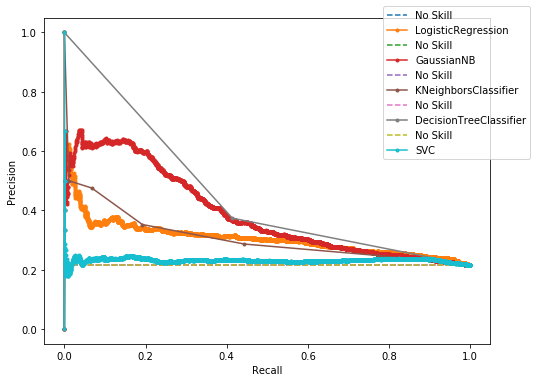

In [116]:
fig = plt.figure(figsize=(8,6))
#marker='.', label=result_table1.loc[i]['classifiers']
for i in result_table1.index:
    #r1=np.vectorize(result_table1.loc[i]['model_recall'])
   # r2=np.vectorize(result_table1.loc[i]['model_precision'])
    r1=result_table1.loc[i]['model_recall']
    r2=result_table1.loc[i]['model_precision']
    pyplot.plot( [0, 1],[result_table1.loc[i]['no_skill'], result_table1.loc[i]['no_skill']], linestyle='--', label='No Skill')
    pyplot.plot(r1, r2,
                
                marker='.', label=i)
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend(bbox_to_anchor=(1.1, 1.05))
# show the plot
pyplot.show()

LogisticRegression(class_weight='balanced'): f1=0.381 auc=0.286
LogisticRegression(class_weight='balanced'): f1=0.381 auc=0.286


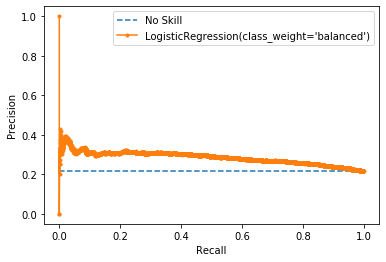

GaussianNB(): f1=0.375 auc=0.387
GaussianNB(): f1=0.375 auc=0.387


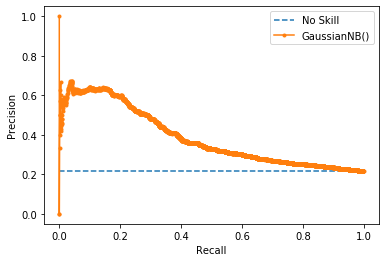

KNeighborsClassifier(): f1=0.249 auc=0.308
KNeighborsClassifier(): f1=0.249 auc=0.308


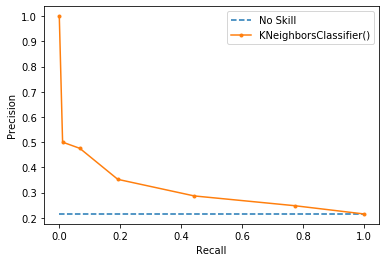

DecisionTreeClassifier(class_weight='balanced'): f1=0.401 auc=0.464
DecisionTreeClassifier(class_weight='balanced'): f1=0.401 auc=0.464


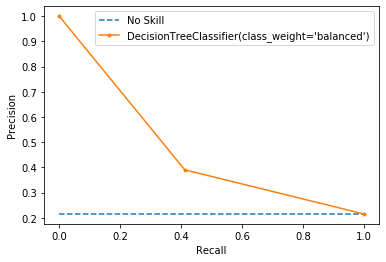

SVC(class_weight='balanced', probability=True): f1=0.391 auc=0.319
SVC(class_weight='balanced', probability=True): f1=0.391 auc=0.319


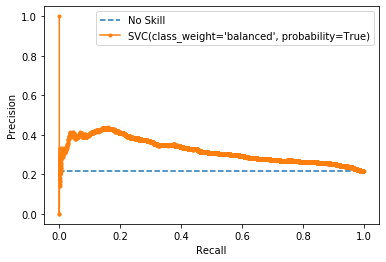

In [100]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

for cls in classifiers:
    model = cls.fit(X_train, Y_train)
    yproba = model.predict_proba(X_validation)[::,1]
    
    # predict class values
    yhat = model.predict(X_validation)
    model_precision, model_recall, _ = precision_recall_curve(Y_validation, yproba)
    model_f1, model_auc = f1_score(Y_validation, yhat), auc(model_recall, model_precision)
    # summarize scores
    print('%s: f1=%.3f auc=%.3f' % (cls,model_f1, model_auc))
    # plot the precision-recall curves
    no_skill = len(Y_validation[Y_validation==1]) / len(Y_validation)
    result_table1 = result_table1.append({'classifiers':cls.__class__.__name__,
                                          'no_skill':no_skill,
                                        'model_recall':model_recall, 
                                        'model_precision':model_precision, 
                                        }, ignore_index=True)

    # predict class values
    yhat = model.predict(X_validation)
    model_precision, model_recall, _ = precision_recall_curve(Y_validation, yproba)
    model_f1, model_auc = f1_score(Y_validation, yhat), auc(model_recall, model_precision)
    # summarize scores
    print('%s: f1=%.3f auc=%.3f' % (cls,model_f1, model_auc))
    # plot the precision-recall curves
    no_skill = len(Y_validation[Y_validation==1]) / len(Y_validation)
    pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    pyplot.plot(model_recall, model_precision, marker='.', label=cls)
    # axis labels
    pyplot.xlabel('Recall')
    pyplot.ylabel('Precision')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()

In [41]:
models1 = []
models1.append(('LR', LogisticRegression(class_weight='balanced')))
models1.append(('KNN', KNeighborsClassifier()))
models1.append(('DecisonTree', DecisionTreeClassifier(class_weight='balanced')))
models1.append(('NB', GaussianNB()))
models1.append(('SVM', SVC(class_weight='balanced')))

In [42]:
results1 = []
names1= []
scoring='f1'
for name, model in models1:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    skf = StratifiedKFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=skf, scoring=scoring)
    results1.append(cv_results)
    names1.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.408515 (0.007387)
KNN: 0.230422 (0.030002)
DecisonTree: 0.400150 (0.013399)
NB: 0.387049 (0.003965)
SVM: 0.415801 (0.007178)


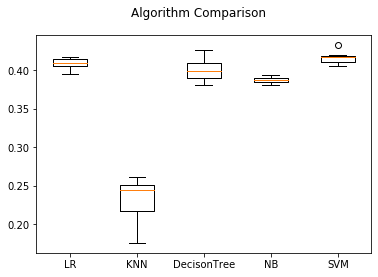

In [43]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results1)
ax.set_xticklabels(names1)
pyplot.show()

# SMOTE

In [54]:
#pip install --user imblearn -U
#pip install scipy --upgrade

In [101]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [102]:
X_train.shape

(24000, 24)

In [103]:
# Deal with imbalance using SMOTE
from imblearn.over_sampling import SMOTE

# Smote train dataset using a 50-50 split
#smote = SMOTE(sampling_strategy=1)
#X_train_resampled, y_train_resampled = smote.fit_sample(X_train, Y_train)
# Transform resample X_train into DataFrame
#X_train_resampled = pd.DataFrame(X_train_resampled)

In [104]:
from imblearn.pipeline import Pipeline

In [105]:
column_names1=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC']
model_results1 = pd.DataFrame(columns = column_names1)

In [106]:
results = []
names = []
tested_models = {
    'lr_weightbalanced': LogisticRegression(class_weight='balanced'),
    'knn_clf': KNeighborsClassifier(),
    'DecisionTree_weightbalanced': DecisionTreeClassifier(class_weight='balanced'),
    'NB': GaussianNB(),
    'svm_clf_weightbalanced': SVC(class_weight='balanced')
}



for model in tested_models:
    pipe = Pipeline([
        ("features", features),
        ('smote',SMOTE(sampling_strategy=1)),
        ('model', tested_models[model])
    ])
    kfold = KFold(n_splits=num_folds, random_state=seed)
    skf = StratifiedKFold(n_splits=num_folds, random_state=111)

    cv_results = cross_validate(tested_models[model],X_train, Y_train, cv=skf,
                        scoring=('accuracy', 'precision', 'recall','f1','roc_auc'), return_train_score=False)
    y_pred=cross_val_predict(tested_models[model], X_train, Y_train,cv=10)
    print('confusion matrix for model: %s :'%(model))
    conf_mat=confusion_matrix(Y_train,y_pred)
    print(conf_mat)
    print('\n')
    
    results.append(cv_results)
    names.append(model)
    
    modeldf =  pd.DataFrame([[model+' smote',cv_results['test_accuracy'].mean(),cv_results['test_precision'].mean(),cv_results['test_recall'].mean(),cv_results['test_f1'].mean(),cv_results['test_roc_auc'].mean()]],
    columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    model_results1 = model_results1.append(modeldf, ignore_index = True)

confusion matrix for model: lr_weightbalanced :
[[11010  7644]
 [ 2011  3335]]


confusion matrix for model: knn_clf :
[[16917  1737]
 [ 4421   925]]


confusion matrix for model: DecisionTree_weightbalanced :
[[15441  3213]
 [ 3223  2123]]


confusion matrix for model: NB :
[[ 4175 14479]
 [  589  4757]]


confusion matrix for model: svm_clf_weightbalanced :
[[10430  8224]
 [ 1784  3562]]




In [107]:
model_results1

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,lr_weightbalanced smote,0.597708,0.303825,0.623828,0.408515,0.640876
1,knn_clf smote,0.743417,0.346498,0.173022,0.230422,0.594068
2,DecisionTree_weightbalanced smote,0.731083,0.396594,0.396747,0.396574,0.611824
3,NB smote,0.372167,0.247331,0.889828,0.387049,0.671863
4,svm_clf_weightbalanced smote,0.583000,0.302223,0.666301,0.415801,0.667797


In [40]:
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,lr,0.777208,0.150000,0.000374,0.000746,0.648921
1,knn_clf,0.743417,0.346498,0.173022,0.230422,0.594068
2,DecisionTree,0.723083,0.386824,0.415646,0.400569,0.613420
3,NB,0.372750,0.247536,0.890015,0.387318,0.671768
4,svm_clf,0.777250,0.000000,0.000000,0.000000,0.568021


In [31]:
models2 = []
models2.append(('LR smote', LogisticRegression()))
models2.append(('KNN smote', KNeighborsClassifier()))
models2.append(('DecisonTree smote', DecisionTreeClassifier()))
models2.append(('NB smote', GaussianNB()))
models2.append(('SVM smote', SVC()))

In [32]:
results2 = []
names2= []
scoring='f1'
for name, model in models2:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    skf = StratifiedKFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=skf, scoring=scoring)
    results2.append(cv_results)
    names2.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR smote: 0.000746 (0.001491)
KNN smote: 0.230422 (0.030002)
DecisonTree smote: 0.406422 (0.016875)
NB smote: 0.387318 (0.004152)
SVM smote: 0.000000 (0.000000)


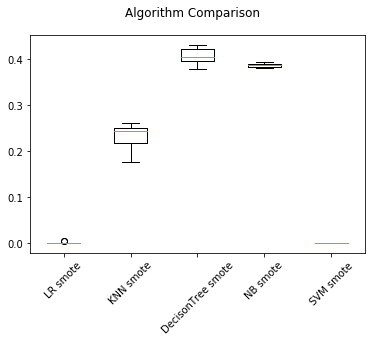

In [34]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results2)
ax.set_xticklabels(names2)
plt.xticks(rotation=45)
pyplot.show()

# PCA

In [51]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
pca = PCA()
X_pca = pca.fit_transform(X_train_scaled)
total_explained_variance = pca.explained_variance_ratio_.cumsum()
n_over_95 = len(total_explained_variance[total_explained_variance >= .95])
print(n_over_95)
print(X.shape[1])
n_to_reach_95 = X.shape[1] - n_over_95 + 1
print('Number features: {}\tTotal Variance Explained: {}'.format(n_to_reach_95, total_explained_variance[n_to_reach_95-1]))

17
35
Number features: 19	Total Variance Explained: 0.9547671414230386


In [95]:
results = []
names = []
tested_models = {
    'lr': LogisticRegression(),
    'LDA': LinearDiscriminantAnalysis(),
    'knn_clf': KNeighborsClassifier(),
    'CART': DecisionTreeClassifier(),
    'NB': GaussianNB(),
    'svm_clf': SVC()
}


skf = StratifiedKFold(n_splits=num_folds, random_state=seed)
for model in tested_models:
    pipe = Pipeline([
        ("features", features),
        ('reduce_dim', PCA(n_components=n_to_reach_95)),
        ('model', tested_models[model])
    ])
    kfold = KFold(n_splits=num_folds, random_state=seed)

    cv_results = cross_validate(tested_models[model],X_train_resampled, y_train_resampled, cv=skf,
                        scoring=('accuracy', 'precision', 'recall','f1','roc_auc'), return_train_score=False)
    results.append(cv_results)
    names.append(model)
    
    modeldf =  pd.DataFrame([[model+' PCA',cv_results['test_accuracy'].mean(),cv_results['test_precision'].mean(),cv_results['test_recall'].mean(),cv_results['test_f1'].mean(),cv_results['test_roc_auc'].mean()]],
    columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    model_results = model_results.append(modeldf, ignore_index = True)

In [103]:
model_results1

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,lr,0.777250,0.200000,0.000374,0.000746,0.648759
1,LDA,0.811958,0.704068,0.268994,0.389054,0.720204
2,knn_clf,0.743417,0.346498,0.173022,0.230422,0.594068
3,CART,0.729958,0.400205,0.424993,0.412183,0.621176
4,NB,0.372167,0.247331,0.889828,0.387049,0.671863
5,svm_clf,0.777250,0.000000,0.000000,0.000000,0.569558
6,lr smote,0.620082,0.613031,0.651601,0.631679,0.659878
7,LDA smote,0.703523,0.723506,0.658247,0.689114,0.749116
8,knn_clf smote,0.751368,0.692844,0.902161,0.783546,0.837494
9,CART smote,0.811170,0.798863,0.814430,0.792047,0.811148


The results suggest that Logistic Regression, Decision Tree and SVM are worth further study based on their f1 score


Further if time is given by the institute we will look into Ensemble methods and ANN to see results